### Load tensorflow

In [1]:
import tensorflow as tf
tf.compat.v1.reset_default_graph()
tf.random.set_seed(13)
import warnings
warnings.filterwarnings('ignore')

### Collect Data

In [2]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.mnist.load_data()

In [3]:
trainX.shape

(60000, 28, 28)

### Convert Output label to multiple values

In [4]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

## Build the Graph

In [5]:
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

### Apply Convolutional Layers, MaxPooling

In [6]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

### Add layers for Classification

In [7]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [9]:
#Train the model
history = model.fit(trainX,trainY,
                    validation_data=(testX,testY),
                    epochs=10,
                    batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 102s 207ms/step - accuracy: 0.8907 - loss: 0.3501 - val_accuracy: 0.9854 - val_loss: 0.0462
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 113s 144ms/step - accuracy: 0.9818 - loss: 0.0599 - val_accuracy: 0.9879 - val_loss: 0.0363
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 160ms/step - accuracy: 0.9887 - loss: 0.0376 - val_accuracy: 0.9902 - val_loss: 0.0302
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 184ms/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9900 - val_loss: 0.0336
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.9921 - loss: 0.0233 - val_accuracy: 0.9903 - val_loss: 0.0323
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 138ms/step - accuracy: 0.9938 - loss: 0.0179 - val_accuracy: 0.9904 - val_loss: 0.0341
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 98s 171ms/step - accuracy: 0.9948 - loss: 0.0144 - val_accuracy: 0.9920 - val_loss: 0.0335
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 117ms/step - accuracy: 0.9956 - loss:

### Exploring History

In [10]:
history

In [11]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [12]:
history.history

{'accuracy': [0.9509000182151794,
  0.9839500188827515,
  0.9891499876976013,
  0.9910666942596436,
  0.9928500056266785,
  0.9944499731063843,
  0.9949166774749756,
  0.9954166412353516,
  0.9965166449546814,
  0.9966333508491516],
 'loss': [0.1612270027399063,
  0.05283059924840927,
  0.03547006472945213,
  0.028188548982143402,
  0.021403955295681953,
  0.017010990530252457,
  0.014262174256145954,
  0.013336015865206718,
  0.0102783078327775,
  0.009712192229926586],
 'val_accuracy': [0.9854000210762024,
  0.9879000186920166,
  0.9901999831199646,
  0.9900000095367432,
  0.9902999997138977,
  0.9904000163078308,
  0.9919999837875366,
  0.9919999837875366,
  0.9897000193595886,
  0.9914000034332275],
 'val_loss': [0.04616113007068634,
  0.0362943559885025,
  0.0301580298691988,
  0.03363005444407463,
  0.03226219862699509,
  0.03408423811197281,
  0.03351571038365364,
  0.034293465316295624,
  0.03881598263978958,
  0.039331525564193726]}

### Plotting history

In [13]:
import matplotlib.pyplot as plt

Accuracy

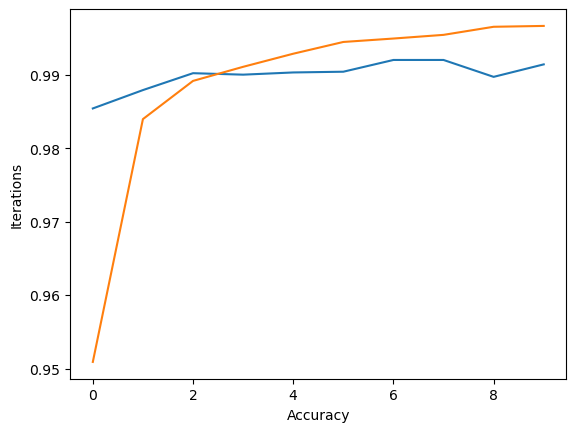

In [15]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Iterations')
plt.show()

Loss

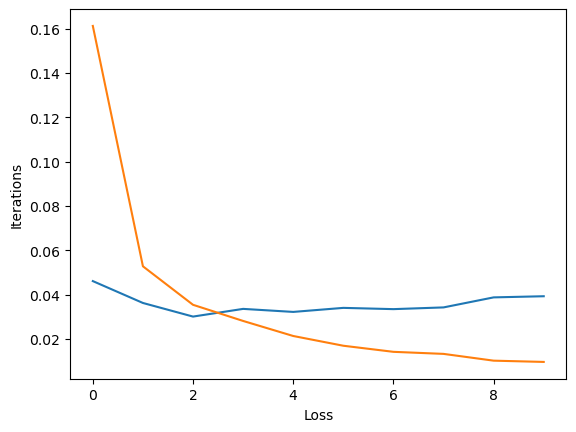

In [16]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Iterations')
plt.show()